# Exercise 4. Personalized system of instruction
![picture 5](../images/4cb4d938f4d9621bf50d49ffeeab1960619add16b4c94a4dac9f6eb37af3311c.png)  
## 3A Fit a logistic regression model with both explanatory variables, perform relevant tests.


In [26]:
psidata = read.table('psi.txt', header=T)
head(psidata)

passed,psi,gpa
0,0,2.66
0,0,2.89
0,0,3.28
0,0,2.92
1,0,4.00
0,0,2.86


In [27]:
# psi$passed = factor(psi$passed)
# psi$psi = factor(psi$psi)
# attach(psi)
psiaov = glm(psidata$passed ~ psidata$psi + psidata$gpa, data=psidata)
anova(psiaov); summary(psiaov)

,Df,Deviance,Resid. Df,Resid. Dev
NULL,NA,NA,31,7.218750
psidata$psi,1,1.290179,30,5.928571
psidata$gpa,1,1.668400,29,4.260172



Call:
glm(formula = psidata$passed ~ psidata$psi + psidata$gpa, data = psidata)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.75656  -0.26063  -0.01606   0.19867   0.80060  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -1.3760     0.4666  -2.949  0.00624 **
psidata$psi   0.3865     0.1367   2.827  0.00842 **
psidata$gpa   0.4975     0.1476   3.370  0.00214 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.1469025)

    Null deviance: 7.2188  on 31  degrees of freedom
Residual deviance: 4.2602  on 29  degrees of freedom
AIC: 34.286

Number of Fisher Scoring iterations: 2


In [28]:
# Just a quick check on what percentage of students passed etc
sum(subset(psidata, psidata$psi == 0)$passed) / length(subset(psidata, psidata$psi == 0)$passed); sum(subset(psidata, psidata$psi == 1)$passed) / length(subset(psidata, psidata$psi == 0)$passed)

[1] 0.1666667

[1] 0.4444444

#### Does psi work? Yes, the proportion of students passing the test with psi is higher, and the GLM shows psi to have a significant effect on passing the test

## 4B Estimate the probability that a student with a gpa equal to 3 who receives psi passes the assignment. Estimate the same probability for a student who does not receive psi. Comment.


In [79]:
gpa_3 = subset(psidata, psidata$gpa >=3)
gpa_3 = subset(gpa_3, gpa_3$gpa < 4)

gpa_nopsi = subset(gpa_3, gpa_3$psi == 0)
gpa_psi = subset(gpa_3, gpa_3$psi == 1)

prop.test(c(2, 5), c(7, 8))

Warning message in prop.test(c(2, 5), c(7, 8)):
"Chi-squared approximation may be incorrect"


	2-sample test for equality of proportions with continuity correction

data:  c(2, 5) out of c(7, 8)
X-squared = 0.63257, df = 1, p-value = 0.4264
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.9470694  0.2684979
sample estimates:
   prop 1    prop 2 
0.2857143 0.6250000 


#### Quick note: no psi got 2/7, with psi got 5/8, so these are the odds, prop.test shows no significance p=0.426

## 4c)  Estimate the relative change in odds of passing the assignment rendered by instructing students with psi rather than the standard method (for an arbitrary student). What is the interpretation of this number? Is it dependent on gpa?

In [90]:
with_psi = subset(psidata, psidata$psi == 1)
without_psi = subset(psidata, psidata$psi == 0)

count_nopsi = length(without_psi$psi)
passed_nopsi = length(subset(without_psi, without_psi$passed == 1)$psi)
count_psi = length(with_psi$psi)
passed_psi = length(subset(with_psi, with_psi$passed == 1)$psi)

passed_nopsi / count_nopsi
passed_psi / count_psi

prop.test(c(passed_nopsi, passed_psi), c(count_nopsi, count_psi))

[1] 0.1666667

[1] 0.5714286

Warning message in prop.test(c(passed_nopsi, passed_psi), c(count_nopsi, count_psi)):
"Chi-squared approximation may be incorrect"


	2-sample test for equality of proportions with continuity correction

data:  c(passed_nopsi, passed_psi) out of c(count_nopsi, count_psi)
X-squared = 4.0657, df = 1, p-value = 0.04376
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.77944268 -0.03008113
sample estimates:
   prop 1    prop 2 
0.1666667 0.5714286 


### Odds of passing increase significantly (p = 0.044) when using psi

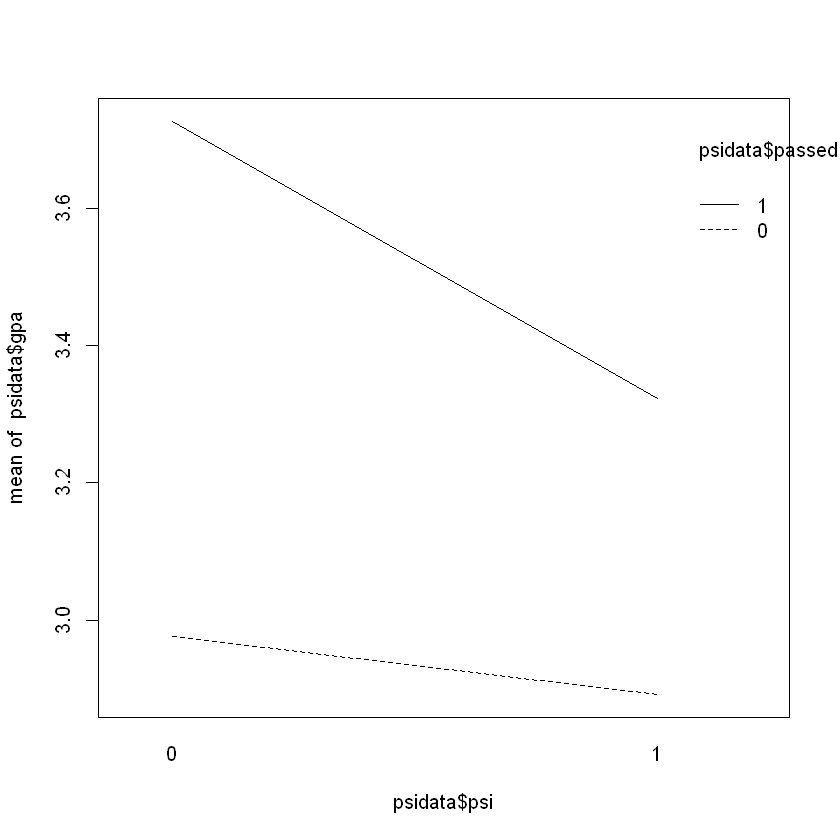

In [100]:
interaction.plot(psidata$psi, psidata$passed, psidata$gpa)
# Heeft waarschijnlijk geen belang; maar studenten met lage gpa
# krijgen dus eerder psi ofzo?

In [105]:
test = lm(psidata$passed ~ psidata$psi * psidata$gpa)
anova(test); shapiro.test(residuals(test))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
psidata$psi,1,1.29017857,1.29017857,8.6403166,0.006521632
psidata$gpa,1,1.66839951,1.66839951,11.1732595,0.002367289
psidata$psi:psidata$gpa,1,0.07919088,0.07919088,0.5303408,0.472510561
Residuals,28,4.18098104,0.14932075,NA,NA



	Shapiro-Wilk normality test

data:  residuals(test)
W = 0.9775, p-value = 0.7244


### GPA influences whether studens pass or not, so passing is dependent on GPA. However, receiving psi is not dependent on gpa, as there is no significant interaction.

## 4D  Propose and perform an alternative method of analysis based on contingency tables. Compare its results to the results of the first approach.

#### Do the chi square test:

In [107]:
head(psidata)

passed,psi,gpa
0,0,2.66
0,0,2.89
0,0,3.28
0,0,2.92
1,0,4.00
0,0,2.86


In [112]:
psimatrix = matrix(c(count_nopsi, count_psi, passed_nopsi, passed_psi), byrow=T, ncol=2, nrow=2)
rownames(psimatrix) = c("count","passed")
colnames(psimatrix) = c("nopsi","psi")
psimatrix

,nopsi,psi
count,18,14
passed,3,8
